In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/0700.HK.csv", index_col="Date", parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-10,228.000000,228.399994,225.399994,226.399994,225.876862,7479213
2017-04-11,228.000000,228.000000,224.199997,225.000000,224.480103,9446922
2017-04-12,225.399994,231.000000,225.199997,231.000000,230.466248,15740467
2017-04-13,229.600006,233.800003,228.800003,230.600006,230.067169,20659980
2017-04-18,230.600006,231.800003,228.000000,228.000000,227.473175,14813343


In [8]:
df[['High', 'Low']].head()

,High,Low
Date,,
2017-04-10,228.399994,225.399994
2017-04-11,228.000000,224.199997
2017-04-12,231.000000,225.199997
2017-04-13,233.800003,228.800003
2017-04-18,231.800003,228.000000


In [59]:
def plot_data(df, label):
    plt.figure(figsize=(10,6))
    ax = df[label].plot()
    ax.set_xlabel("Date")
    ax.set_ylabel(label)
    plt.show()

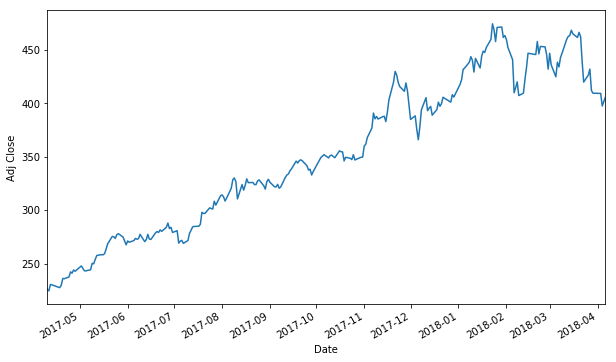

In [60]:
plot_data(df, 'Adj Close')

## Rolling Means

In [30]:
def plot_rolling_mean(label):
    rm = df[label].rolling(window=20).mean()
    plt.figure(figsize=(10,6))
    ax = df[label].plot(title='Rolling Means')
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    rm.plot(label='Rolling Mean', ax=ax)
    plt.legend(loc='upper left')
    plt.show()

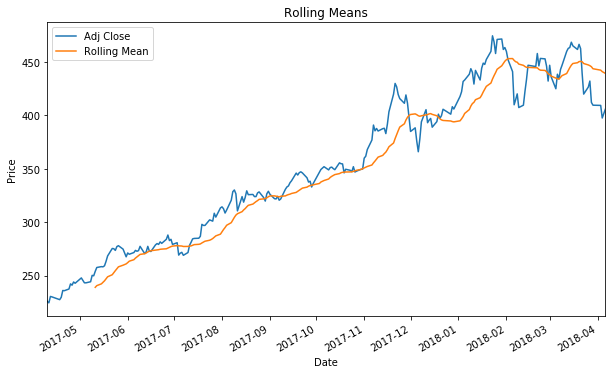

In [31]:
plot_rolling_mean('Adj Close')

## Bollinger Bands

In [25]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window=window).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    return values.rolling(window=window).std()


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper_band = rm + 2*rstd
    lower_band = rm - 2*rstd
    return upper_band, lower_band

In [28]:
def plot_bollinger_bands(label):
    rm = get_rolling_mean(df[label], window=20)
    rstd = get_rolling_std(df[label], window=20)
    upper_band, lower_band = get_bollinger_bands(rm, rstd)
    
    plt.figure(figsize=(10,6))
    ax = df[label].plot(title='Bollinger Bands')
    rm.plot(label='Rolling Mean', ax=ax)
    upper_band.plot(label='Upper Band', ax=ax)
    lower_band.plot(label='Lower Band', ax=ax)
    plt.legend(loc='upper left')
    plt.show()

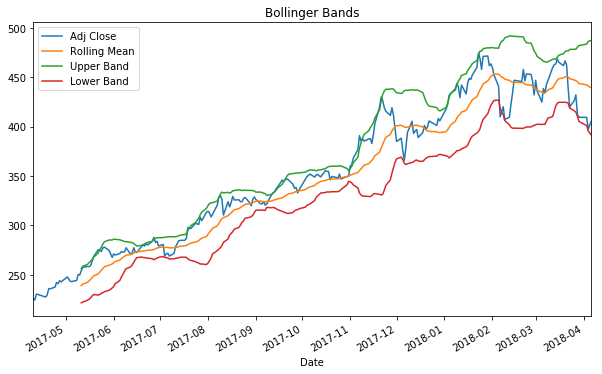

In [29]:
plot_bollinger_bands('Adj Close')

## Daily Returns

In [48]:
def plot_data(df, title="", xlabel="Date", ylabel="Price"):
    plt.figure(figsize=(10,6))
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
    
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = (df / df.shift(1)) - 1
    daily_returns[0] = 0
    return daily_returns

def plot_daily_returns(df):
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")

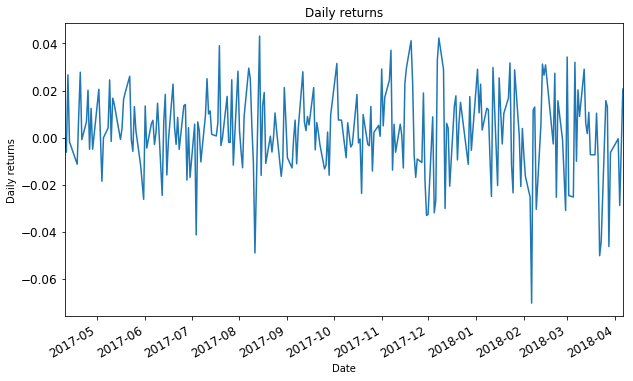

In [49]:
plot_daily_returns(df['Adj Close'])